In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pn
import numpy as np


#Aşağıdaki sistem colab da çalışmadı ben de jupyter de çalıştırıp verileri alıp bilgisyara yükledim oradan da buraya

In [ ]:
sehir='ankara'
sayfa=5                 #İlandan kaç sayfa veri çekmek istiyorsanız buraya yazınız
                        # Her bir sayfadaki ilanların bir listesini oluşturalım
liste=[]
for i in range(1,sayfa):
  url="https://www.hurriyetemlak.com/"+sehir+"-kiralik?page="+str(i)
  response=requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  soup.beautify
  liste.append(soup)

listeler=[BeautifulSoup(requests.get("https://www.hurriyetemlak.com/"+sehir+"-kiralik?page="+str(i)).text,"html.parser") for i in range(1,10)]



In [ ]:
# Her ilan için bir link oluşturup ilan detay sayfasına gidelim
soups=[]
for soup in listeler:
  print(soup.findAll('a', href=True))
  for link in soup.findAll('a', href=True):
    print(4)
    if ('kiralik' in link['href']) and (link['class']==['card-link']):
          url="https://www.hurriyetemlak.com" + link['href']
          response=requests.get(url) 
          soup = BeautifulSoup(response.text, "html.parser")
          soup.beautify
          soups.append(soup)


[]
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
# Tüm ilan detay sayfalaındaki bilgileri bir listeleyelim.  
for soup in soups:
  for ul in soup.findAll("ul",{"class":"adv-info-list"}):
    for i in range(len(ul.findAll('li'))):
      print(4)
      print( ul.findAll('li')[i].findAll('span')[0].text+":"+ ul.findAll('li')[i].findAll('span')[1].text)
soups
            

[]

In [ ]:
# Her ilanda farklı sayıda özellik var bu yüzden dinamik bir tablo oluşturmak gerek.
a=[]
for soup in soups:
    for ul in soup.findAll("ul",{"class":"adv-info-list"}):
        a.append(len(ul.findAll('li')))
a

[]

In [ ]:
#İlan detay sayfasından gelecek tüm alanlar için boş bir DataFrame oluşturalım
df=pd.DataFrame()
for soup in soups:
    row={} #her ilan detayı için bir sözlük oluşturalım
    row['Fiyat']= soup.findAll('p',{"class":"fontRB fz24 price"})[0].text
    for ul in soup.findAll("ul",{"class":"adv-info-list"}):
        for i in range(len(ul.findAll('li'))):
            row[ul.findAll('li')[i].findAll('span')[0].text]= ul.findAll('li')[i].findAll('span')[1].text
    df = df.append(row, ignore_index=True)
        # Sözlükteki alanlar ile df alanları uyuştukça ekleme yapacak uyuşmayan alanlar için boş geçecek

# bu kodlar burada çalışmadığı için jupyterde yaptım ankara csv dosyası oluşturdum.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için link

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek içi

Saving ankara.csv to ankara.csv


In [ ]:
import pandas as pn

In [ ]:
Tablo=pn.read_csv("ankara.csv")

In [ ]:
Tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aidat                  408 non-null    object 
 1   Banyo Sayısı           512 non-null    float64
 2   Bina Yaşı              512 non-null    object 
 3   Brüt / Net M2          512 non-null    object 
 4   Bulunduğu Kat          501 non-null    object 
 5   Depozito               442 non-null    object 
 6   Eşya Durumu            512 non-null    object 
 7   Fiyat                  512 non-null    object 
 8   Isınma Tipi            512 non-null    object 
 9   Kat Sayısı             511 non-null    object 
 10  Konut Şekli            512 non-null    object 
 11  Kullanım Durumu        485 non-null    object 
 12  Oda + Salon Sayısı     512 non-null    object 
 13  Son Güncelleme Tarihi  512 non-null    object 
 14  Yakıt Tipi             482 non-null    object 
 15  Yapı T

In [ ]:
Tablo.drop(['Kira Getirisi','Tapu Durumu','Takas','Krediye Uygunluk'],axis=1,inplace=True)

In [ ]:
Tablo[Tablo['Bina Yaşı'].isnull()]

,Aidat,Banyo Sayısı,Bina Yaşı,Brüt / Net M2,Bulunduğu Kat,Depozito,Eşya Durumu,Fiyat,Isınma Tipi,Kat Sayısı,Konut Şekli,Kullanım Durumu,Oda + Salon Sayısı,Son Güncelleme Tarihi,Yakıt Tipi,Yapı Tipi,Yapının Durumu,İlan Durumu,İlan no,Cephe,Site İçerisinde
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Tablo.drop([113,237],inplace=True)

In [ ]:
Tablo.isnull().sum()

Aidat                    104
Banyo Sayısı               0
Bina Yaşı                  0
Brüt / Net M2              0
Bulunduğu Kat             11
Depozito                  70
Eşya Durumu                0
Fiyat                      0
Isınma Tipi                0
Kat Sayısı                 1
Konut Şekli                0
Kullanım Durumu           27
Oda + Salon Sayısı         0
Son Güncelleme Tarihi      0
Yakıt Tipi                30
Yapı Tipi                 49
Yapının Durumu            53
İlan Durumu                0
İlan no                    0
Cephe                     65
Site İçerisinde          375
dtype: int64

In [ ]:
Tablo['Aidat'].replace(' TL','',regex=True,inplace=True)
Tablo['Aidat'].replace(',','',regex=True,inplace=True)
Tablo['Aidat'].replace('USD','',regex=True,inplace=True)

In [ ]:
Tablo['Bina Yaşı'].unique()

array(['12 Yaşında', '17 Yaşında', '35 Yaşında', 'Sıfır Bina',
       '50 Yaşında', '45 Yaşında', '20 Yaşında', '21 Yaşında',
       '10 Yaşında', '3 Yaşında', '2 Yaşında', '7 Yaşında', '5 Yaşında',
       '15 Yaşında', '40 Yaşında', '25 Yaşında', '1 Yaşında',
       '26 Yaşında', '30 Yaşında', '4 Yaşında', '22 Yaşında',
       '33 Yaşında', '19 Yaşında', '23 Yaşında', '11 Yaşında',
       '18 Yaşında', '9 Yaşında', '8 Yaşında', '28 Yaşında', '16 Yaşında',
       '29 Yaşında', '27 Yaşında', '38 Yaşında', '13 Yaşında',
       '31 Yaşında', '14 Yaşında', '32 Yaşında', '24 Yaşında',
       '60 Yaşında', '39 Yaşında'], dtype=object)

In [ ]:
Tablo['Bina Yaşı']=Tablo['Bina Yaşı'].replace({'Yaşında':'','Sıfır Bina':0,' ':''},regex=True).astype('int64')

In [ ]:
# Binanı yaşı arttıkça fiyata etkisi ters olur ben de bu yüzden en yaşlı binadan çıkardım hepsini.

Tablo['Bina Yaşı']=Tablo['Bina Yaşı'].max()-Tablo['Bina Yaşı']

In [ ]:
Tablo['Brüt / Net M2'].unique()

array(['130 m2', '135 m2', '125 m2', '100 m2', '70 m2', '90 m2', '170 m2',
       '80 m2', '85 m2', '110 m2', '60 m2', '225 m2', '150 m2', '256 m2',
       '75 m2', '220 m2', '140 m2', '120 m2', '210 m2', '65 m2', '109 m2',
       '165 m2', '95 m2', '105 m2', '66 m2', '160 m2', '192 m2', '89 m2',
       '115 m2', '118 m2', '116 m2', '182 m2', '92 m2', '84 m2', '190 m2',
       '145 m2', '30 m2', '300 m2', '200 m2', '180 m2', '94 m2', '280 m2',
       '204 m2', '79 m2', '62 m2', '177 m2', '55 m2', '139 m2', '430 m2',
       '193 m2', '185 m2', '275 m2', '230 m2', '250 m2', '251 m2',
       '540 m2', '81 m2', '45 m2', '119 m2', '198 m2', '151 m2', '500 m2',
       '650 m2', '550 m2', '50 m2', '98 m2', '49 m2', '195 m2', '226 m2',
       '155 m2', '215 m2', '152 m2', '164 m2', '111 m2', '144 m2',
       '1,500 m2', '96 m2', '175 m2', '330 m2', '128 m2', '40 m2',
       '44 m2', '25 m2'], dtype=object)

In [ ]:
Tablo['Brüt / Net M2']=Tablo['Brüt / Net M2'].replace({'m2':'',',':''},regex=True).astype('int64')

In [ ]:
Tablo['Kat Sayısı'].unique()

array(['3 Katlı', '4 Katlı', '6 Katlı', '2 Katlı', '7 Katlı', '27 Katlı',
       '32 Katlı', '30 Katlı', '5 Katlı', '16 Katlı', '34 Katlı',
       '39 Katlı', '14 Katlı', '20 Katlı', '9 Katlı', '15 Katlı',
       '12 Katlı', '13 Katlı', '10 Katlı', '17 Katlı', '25 Katlı',
       '22 Katlı', '11 Katlı', '8 Katlı', '19 Katlı', '36 Katlı',
       '33 Katlı', '21 Katlı', '18 Katlı', nan, '26 Katlı', '300 Katlı',
       '1 Katlı'], dtype=object)

In [ ]:
Tablo['Kat Sayısı']=Tablo['Kat Sayısı'].replace('Katlı','',regex=True)

In [ ]:
Tablo[Tablo['Bulunduğu Kat']=='Teras Katı']['Kat Sayısı']
# bunlar 3 ve 4 katlı olduğu için bunları aşağıdaki gibi doldurdum

415    3 
421    4 
Name: Kat Sayısı, dtype: object

In [ ]:
Tablo['Bulunduğu Kat'].unique()
 # kot zemin katta yer alan dairenin altındaki daireye verilen isimdir
 # kot1:-1
 # kot2:-2
 # kot3:-3
 # Yüksek Giriş: giris katı :0 
 # Bahçe katı: 0
 # Villa Katı:1
 # Teras katı: en üksek katmıs

array(['3. Kat', '5. Kat', 'Yüksek Giriş', '1. Kat', 'Kot 1', '2. Kat',
       'Giriş Katı', '15. Kat', 'Ara Kat', '21 ve üzeri', '7. Kat',
       'Kot 2', '12. Kat', '8. Kat', '4. Kat', 'Bahçe Katı', '10. Kat',
       '6. Kat', '9. Kat', nan, '11. Kat', '13. Kat', 'Zemin',
       'En Üst Kat', 'Kot 3', '17. Kat', 'Villa Katı', '14. Kat',
       'Teras Katı'], dtype=object)

In [ ]:
Tablo['Bulunduğu Kat'].replace({'Yüksek Giriş':0,'Kot 1':-1,'Giriş Katı':0,'Ara Kat':3,'ve üzeri':'','Kot 2':-2,'Bahçe Katı':0,'Zemin':0,'Kot 3':-3,'Villa Katı':1},regex=True,inplace=True)
Tablo['Bulunduğu Kat'].replace({'En Üst Kat':4,'Teras Katı':4},regex=True,inplace=True)
Tablo['Bulunduğu Kat'].replace('. Kat','',regex=True,inplace=True)

In [ ]:
Tablo[Tablo['Bulunduğu Kat'].notnull()>Tablo['Kat Sayısı'].notnull()]

,Aidat,Banyo Sayısı,Bina Yaşı,Brüt / Net M2,Bulunduğu Kat,Depozito,Eşya Durumu,Fiyat,Isınma Tipi,Kat Sayısı,Konut Şekli,Kullanım Durumu,Oda + Salon Sayısı,Son Güncelleme Tarihi,Yakıt Tipi,Yapı Tipi,Yapının Durumu,İlan Durumu,İlan no,Cephe,Site İçerisinde


In [ ]:
Tablo['Bulunduğu Kat'].unique()

array(['3', '5', 0, '1', -1, '2', '15', 3, '21 ', '7', -2, '12', '8', '4',
       '10', '6', '9', nan, '11', '13', 4, -3, '17', 1, '14'],
      dtype=object)

In [ ]:
Tablo['Eşya Durumu'].unique()

array(['Eşyalı Değil', 'Eşyalı'], dtype=object)

In [ ]:
Tablo['Eşya Durumu'].replace({'Eşyalı Değil':0,'Eşyalı':1},regex=True,inplace=True)

In [ ]:
Tablo['Fiyat']

0      \n1,500 TL\n
1      \n1,500 TL\n
2      \n1,200 TL\n
3      \n1,000 TL\n
4      \n2,600 TL\n
           ...     
509    \n1,600 TL\n
510    \n2,000 TL\n
511    \n1,200 TL\n
512      \n700 TL\n
513    \n1,850 TL\n
Name: Fiyat, Length: 512, dtype: object

In [ ]:
Tablo['Fiyat']=Tablo['Fiyat'].replace({'\n':'',',':'','TL':''},regex=True).astype('int64')

In [ ]:
Tablo['Isınma Tipi'].unique()

array(['Kombi', 'Merkezi', 'Merkezi (Pay Ölçer)', 'Soba', 'Belirtilmemiş',
       'Kat Kaloriferi'], dtype=object)

In [ ]:
Tablo['Isınma Tipi'].replace({'Kombi':6,'Merkezi (Pay Ölçer)':5,'Merkezi':4,'Kat Kaloriferi':3,'Soba':2,'Belirtilmemiş':0},regex=True,inplace=True)

In [ ]:
Tablo['Konut Şekli'].unique()

array(['Daire', 'Residence', 'Müstakil Ev', 'Bina', 'Villa'], dtype=object)

In [ ]:
Tablo['Konut Şekli']=Tablo['Konut Şekli'].replace({'Villa':5,'Residence':4,'Müstakil Ev':3,'Bina':2,'Daire':1},regex=True).astype('int64')

In [ ]:
Tablo['Kullanım Durumu'].unique()

array(['Boş', 'Kiracı Oturuyor', 'Ev Sahibi Oturuyor', nan,
       'Belirtilmemiş'], dtype=object)

In [ ]:
Tablo['Kullanım Durumu'].fillna(0,inplace=True)

In [ ]:
Tablo['Kullanım Durumu']=Tablo['Kullanım Durumu'].replace({'Boş':4,'Kiracı Oturuyor':3,'Ev Sahibi Oturuyor':2,'Belirtilmemiş':1},regex=True).astype('int64')

In [ ]:
Tablo['Oda + Salon Sayısı'].unique()

array(['3 + 1', '2 + 1', '1 + 1', '2 + 120', '4 + 1', '4 + 2', '5 + 1',
       '1 + 0', '5 + 2', '6 + 1', '7 + 2', '5 + 3', '20 + 4'],
      dtype=object)

In [ ]:
Tablo['Oda + Salon Sayısı'].replace({'[^0-9]+':''},regex=True,inplace=True)
Tablo['Oda + Salon Sayısı'].unique()

array(['31', '21', '11', '2120', '41', '42', '51', '10', '52', '61', '72',
       '53', '204'], dtype=object)

In [ ]:
Tablo['Oda + Salon Sayısı'].replace({'31':4,'21':3,'11':2,'2120':14,'41':5,'42':6,'51':6,'10':1,'52':7,'53':8,'204':24,'61':7,'72':9},regex=True,inplace=True)
Tablo['Oda + Salon Sayısı'].unique()

array([ 4,  3,  2,  5,  6,  1,  7,  9,  8, 24])

In [ ]:
Tablo['Son Güncelleme Tarihi'].unique()

array(['3 Gün Önce', '12 Gün Önce', 'Bugün', '2 Gün Önce', '70 Gün Önce',
       '11 Gün Önce', '139 Gün Önce', '22 Gün Önce', '45 Gün Önce',
       '103 Gün Önce', '4 Gün Önce', '157 Gün Önce', '7 Gün Önce',
       '21 Gün Önce', '131 Gün Önce', '6 Gün Önce', '25 Gün Önce',
       '5 Gün Önce', '8 Gün Önce', 'Dün'], dtype=object)

In [ ]:
Tablo['Son Güncelleme Tarihi']=Tablo['Son Güncelleme Tarihi'].replace({'Gün Önce':'','Dün':1,'Bugün':0},regex=True).astype('int64')

In [ ]:
Tablo['Yakıt Tipi'].fillna('Doğalgaz',inplace=True)
Tablo['Yakıt Tipi'].unique()

array(['Doğalgaz', 'Kömür-Odun', 'Elektrik'], dtype=object)

In [ ]:
Tablo['Yakıt Tipi'].replace({'Doğalgaz':2,'Elektrik':1},regex=True,inplace=True)

In [ ]:
Tablo.drop(['İlan no','Yapı Tipi'],axis=1,inplace=True)

In [ ]:
Tablo['Yapının Durumu'].unique()

array(['İkinci El', 'Sıfır', nan], dtype=object)

In [ ]:
Tablo['Yapının Durumu'].value_counts()

İkinci El    416
Sıfır         43
Name: Yapının Durumu, dtype: int64

In [ ]:
Tablo['Yapının Durumu'].fillna('İkinci El',limit=49,inplace=True)
Tablo['Yapının Durumu'].fillna('Sıfır',limit=4,inplace=True)
Tablo['Yapının Durumu'].isnull().sum()

0

In [ ]:
Tablo['Yapının Durumu']=Tablo['Yapının Durumu'].replace({'İkinci El':0,'Sıfır':1},regex=True).astype('int64')

In [ ]:
Tablo['Cephe '].unique()

array([nan, 'Kuzey, ', 'Güney, ', 'Batı', 'Güney', 'Doğu', 'Doğu, ',
       'Kuzey'], dtype=object)

In [ ]:
Tablo['Cephe '].isnull().sum()

65

In [ ]:
Tablo['Cephe '].value_counts()

Güney,     191
Kuzey,     114
Batı        41
Güney       40
Doğu        34
Doğu,       21
Kuzey        6
Name: Cephe , dtype: int64

In [ ]:
Tablo['Cephe '].fillna('Güney,',limit=30,inplace=True)
Tablo['Cephe '].fillna('Kuzey,',limit=20,inplace=True)
Tablo['Cephe '].fillna('Batı',limit=5,inplace=True)
Tablo['Cephe '].fillna('Doğu',limit=10,inplace=True)

In [ ]:
Tablo['Cephe '].replace({'Güney':4,'Güney,':4,'Doğu':3,'Doğu,':3,'Batı':2,'Kuzey':1,'Kuzey,':1},regex=True,inplace=True)

In [ ]:
Tablo['Site İçerisinde'].unique()

array([nan, 'PARK LİMA', 'HAYALPARK EVLERİ', 'DURU BEYTEPE',
       'BAŞKENT EMLAK KONUTLARI', 'İNCEK VİSTA', 'SİNPAŞ MARİNA TOWER',
       'ALTINORAN', 'BAŞKENT EMLAKKONUT', 'Evet (Site Adı Belirtilmemiş)',
       'PARK LOPELYA SİTESİ', 'AP ISTGATE', 'BAŞKENT EMLAK KONUTLARI ',
       'Soyak Blokları', 'MİLENYUM SİTESİ', 'Zirvekent', 'oral82',
       '3.Etap', 'HİTTOWN', 'Hayatsebla Evleri', 'SUTEK SİTESİ',
       'safran residence', 'Duru Beytepe', 'Şenyuva ( Tusso ) Bl',
       'Kuzu Kumru Residence', 'mesa', 'işçi blokları',
       'Tusso (Şenyuva) Blok', 'KENT SİTESİ', 'EGE FLORA',
       'Ankara Çankaya Sitesi', '2.Etap', 'park oran ',
       'RÖNESANS NEVA KONAKLARI', 'PARK ORAN KONUTLARI', 'Aktürk Sitesi',
       'sinpaş marina', 'MARİNA ANKARA', 'FIRAT LİFE', 'SİNPAŞ ALTINORAN',
       'MESA 66', 'ÖYKÜM SİTESİ', 'paşa evleri', 'BULVAR LOFT',
       'Küçük Evlerimiz villa', '312 ULUSOY CITY', 'ÖZKOÇ',
       'ETLİK EMLAK BANKASI ', 'Gökkuşağı', 'KAYIKENT SİTESİ',
       'YAMAÇE

In [ ]:
Tablo['Site İçerisinde'].fillna(0,inplace=True)

In [ ]:
indexs=list(Tablo[Tablo['Site İçerisinde']!=0]['Site İçerisinde'].index)

In [ ]:
Tablo['Site İçerisinde'].loc[indexs]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
Tablo['Site İçerisinde'].unique()

array([0, 1], dtype=object)

site içindeyse 1 
site içinde değilse 0

In [ ]:
Tablo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 513
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aidat                  408 non-null    object 
 1   Banyo Sayısı           512 non-null    float64
 2   Bina Yaşı              512 non-null    int64  
 3   Brüt / Net M2          512 non-null    int64  
 4   Bulunduğu Kat          501 non-null    object 
 5   Depozito               442 non-null    object 
 6   Eşya Durumu            512 non-null    int64  
 7   Fiyat                  512 non-null    int64  
 8   Isınma Tipi            512 non-null    int64  
 9   Kat Sayısı             511 non-null    object 
 10  Konut Şekli            512 non-null    int64  
 11  Kullanım Durumu        512 non-null    int64  
 12  Oda + Salon Sayısı     512 non-null    int64  
 13  Son Güncelleme Tarihi  512 non-null    int64  
 14  Yakıt Tipi             512 non-null    object 
 15  Yapını

In [ ]:
indx=list(Tablo[Tablo['Aidat'].notnull()]['Aidat'].astype('int64').index)

In [ ]:
Tablo['Aidat'][indx].astype('int64').mean()

279.58088235294116

In [ ]:
Tablo['Aidat'][indx].astype('int64').median()

100.0

In [ ]:
Q1=Tablo['Aidat'][indx].astype('int64').quantile(0.25)
Q3=Tablo['Aidat'][indx].astype('int64').quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR

In [ ]:
aykiri=list(Tablo['Aidat'][indx].astype('int64')[Tablo['Aidat'][indx].astype('int64')>ust_sinir].index)
Tablo['Aidat'][aykiri]=ust_sinir
Tablo['Aidat'].fillna(Tablo['Aidat'][indx].astype('int64').mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Tablo['Depozito'].replace(' TL','',regex=True,inplace=True)
Tablo['Depozito'].replace(',','',regex=True,inplace=True)
Tablo['Depozito'].replace('EUR','',regex=True,inplace=True)
Tablo['Depozito'].replace('USD','',regex=True,inplace=True)

In [ ]:
Tablo['Depozito'].fillna(Tablo[Tablo['Depozito'].notnull()]['Depozito'].astype('int64').median(),inplace=True)


In [ ]:
Tablo['Bulunduğu Kat'].fillna(Tablo[Tablo['Bulunduğu Kat'].notnull()]['Bulunduğu Kat'].astype('int64').median(),inplace=True)

In [ ]:
Tablo['Kat Sayısı'].fillna(Tablo[Tablo['Kat Sayısı'].notnull()]['Kat Sayısı'].astype('int64').median(),inplace=True)

In [ ]:
Tablo

,Aidat,Banyo Sayısı,Bina Yaşı,Brüt / Net M2,Bulunduğu Kat,Depozito,Eşya Durumu,Fiyat,Isınma Tipi,Kat Sayısı,Konut Şekli,Kullanım Durumu,Oda + Salon Sayısı,Son Güncelleme Tarihi,Yakıt Tipi,Yapının Durumu,İlan Durumu,Cephe,Site İçerisinde
0,30,1.0,48,130,3,1500,0,1500,6,3,1,4,4,3,2,0,Kiralık,4,0
1,35,1.0,43,135,3,1500,0,1500,6,4,1,4,4,12,2,0,Kiralık,1,0
2,50,1.0,25,125,5,1200,0,1200,6,6,1,4,4,0,2,0,Kiralık,4,0
3,30,1.0,43,100,0,1000,0,1000,6,2,1,4,3,0,2,1,Kiralık,4,0
4,1,1.0,60,70,0,2600,1,2600,4,4,1,4,2,0,2,1,Kiralık,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,270,1.0,46,128,8,1600,0,1600,6,9,1,4,4,0,2,0,Kiralık,3,1
510,203.544,1.0,45,25,1,1800,0,2000,4,4,1,0,1,0,1,1,Kiralık,3,0
511,175,1.0,30,95,4,1200,0,1200,6,4,1,4,3,1,2,0,Kiralık,4,0
512,113,1.0,60,100,0,1750,0,700,4,6,1,4,3,0,2,1,Kiralık,4,1


In [ ]:
Tablo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 513
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aidat                  512 non-null    object 
 1   Banyo Sayısı           512 non-null    float64
 2   Bina Yaşı              512 non-null    int64  
 3   Brüt / Net M2          512 non-null    int64  
 4   Bulunduğu Kat          512 non-null    object 
 5   Depozito               512 non-null    object 
 6   Eşya Durumu            512 non-null    int64  
 7   Fiyat                  512 non-null    int64  
 8   Isınma Tipi            512 non-null    int64  
 9   Kat Sayısı             512 non-null    object 
 10  Konut Şekli            512 non-null    int64  
 11  Kullanım Durumu        512 non-null    int64  
 12  Oda + Salon Sayısı     512 non-null    int64  
 13  Son Güncelleme Tarihi  512 non-null    int64  
 14  Yakıt Tipi             512 non-null    object 
 15  Yapını

In [ ]:

Tablo['Bulunduğu Kat']=Tablo['Bulunduğu Kat'].astype('int64')
Tablo['Depozito']=Tablo['Depozito'].astype('int64')
Tablo['Kat Sayısı']=Tablo['Kat Sayısı'].astype('int64')
Tablo['Site İçerisinde']=Tablo['Site İçerisinde'].astype('int64')

In [ ]:
Tablo2=Tablo.copy()

In [ ]:
import seaborn as sns

# regression eğrisinin eğimini gerçeğe yaklaştırmak için aykırıları kaldıracağım

In [ ]:
def aykiri_yok_edici(x):
  Q1=Tablo2[x].quantile(0.25)
  Q3=Tablo2[x].quantile(0.75)
  IQR=Q3-Q1
  alt_sinir=Q1-1.5*IQR
  ust_sinir=Q3+1.5*IQR
  Tablo2[x][Tablo2[x]>=ust_sinir]=ust_sinir
  Tablo2[x][Tablo2[x]<=alt_sinir]=alt_sinir

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


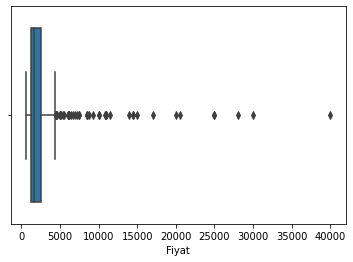

In [ ]:
sns.boxplot(Tablo2['Fiyat'])

In [ ]:
aykiri_yok_edici('Fiyat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


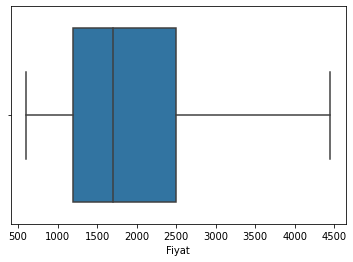

In [ ]:
sns.boxplot(Tablo2['Fiyat'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


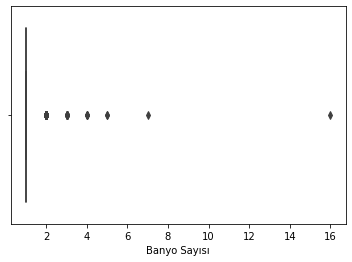

In [ ]:
sns.boxplot(Tablo2['Banyo Sayısı'])

In [ ]:
Tablo2['Banyo Sayısı']=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


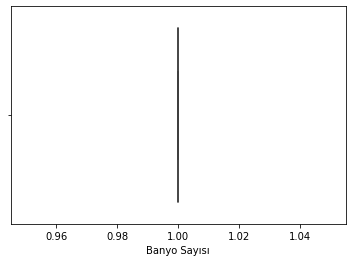

In [ ]:
sns.boxplot(Tablo2['Banyo Sayısı'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


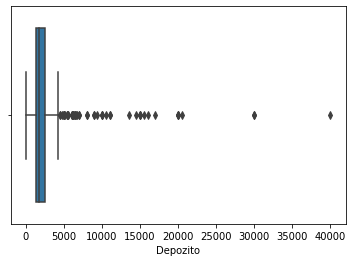

In [ ]:
sns.boxplot(Tablo2['Depozito'])

In [ ]:
aykiri_yok_edici('Depozito')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


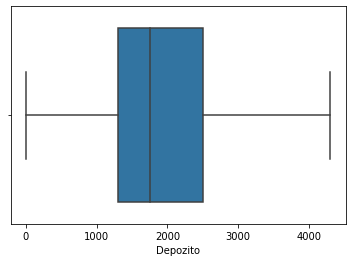

In [ ]:
sns.boxplot(Tablo2['Depozito'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


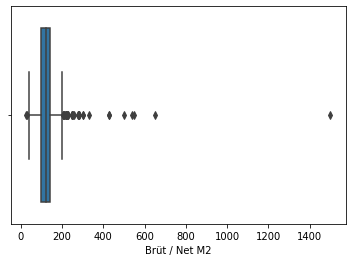

In [ ]:
sns.boxplot(Tablo2['Brüt / Net M2'])

In [ ]:
aykiri_yok_edici('Brüt / Net M2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


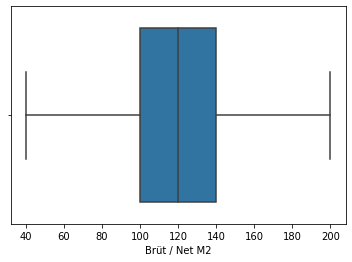

In [ ]:
sns.boxplot(Tablo2['Brüt / Net M2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


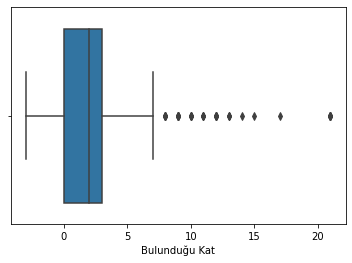

In [ ]:
sns.boxplot(Tablo2['Bulunduğu Kat'])

In [ ]:
aykiri_yok_edici('Bulunduğu Kat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


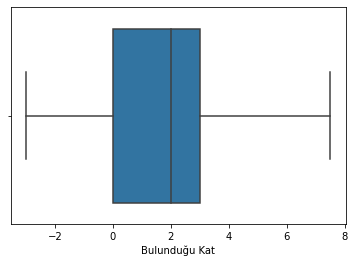

In [ ]:
sns.boxplot(Tablo2['Bulunduğu Kat'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


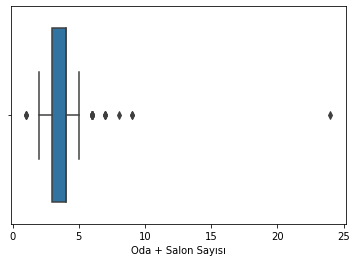

In [ ]:
sns.boxplot(Tablo2['Oda + Salon Sayısı'])

In [ ]:
aykiri_yok_edici('Oda + Salon Sayısı')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


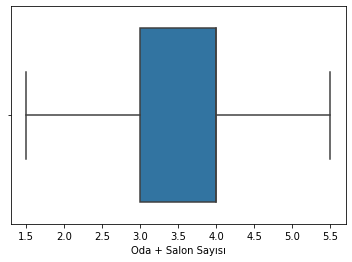

In [ ]:
sns.boxplot(Tablo2['Oda + Salon Sayısı'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


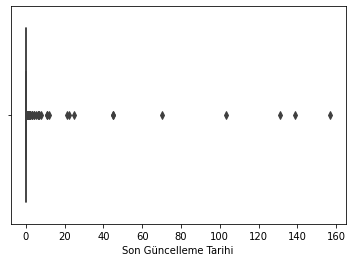

In [ ]:
sns.boxplot(Tablo2['Son Güncelleme Tarihi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


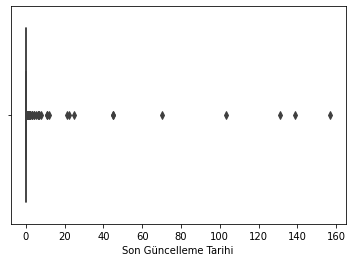

In [ ]:
sns.boxplot(Tablo2['Son Güncelleme Tarihi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


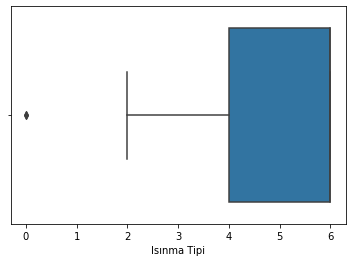

In [ ]:
sns.boxplot(Tablo2['Isınma Tipi'])

In [ ]:
aykiri_yok_edici('Isınma Tipi')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


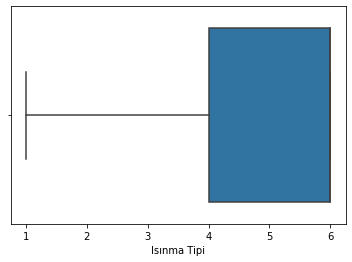

In [ ]:
sns.boxplot(Tablo2['Isınma Tipi'])

In [ ]:
Tablo[:2]

,Aidat,Banyo Sayısı,Bina Yaşı,Brüt / Net M2,Bulunduğu Kat,Depozito,Eşya Durumu,Fiyat,Isınma Tipi,Kat Sayısı,Konut Şekli,Kullanım Durumu,Oda + Salon Sayısı,Son Güncelleme Tarihi,Yakıt Tipi,Yapının Durumu,İlan Durumu,Cephe,Site İçerisinde
0,30,1.0,48,130,3,1500,0,1500,6,3,1,4,4,3,2,0,Kiralık,4,0
1,35,1.0,43,135,3,1500,0,1500,6,4,1,4,4,12,2,0,Kiralık,1,0


# Makine Öğrenmesi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

R=Ridge()
L=Lasso()
Lr=LinearRegression()
Etr=ExtraTreeRegressor()
Dtr=DecisionTreeRegressor()
Knn=KNeighborsRegressor()
Gbr=GradientBoostingRegressor()

In [ ]:
x=Tablo2.drop('Fiyat',axis=1)
y=Tablo2['Fiyat']

In [ ]:
x=pn.get_dummies(x,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [ ]:
def fitting(x_train,x_test,y_train,y_test):
  algo=[R,L,Lr,Etr,Dtr,Knn,Gbr]
  algo_names=['Ridge','Lasso','LinearReg','ExtaTreeReg','DecisionTreeReg','KNeighborsReg','GradientBoostingReg']
  mean_a=[]
  mean_s=[]
  r2=[]
  for x in algo:
    model=x.fit(x_train,y_train)
    pred=model.predict(x_test)
    mean_a.append(mean_absolute_error(y_test,pred))
    mean_s.append(mean_squared_error(y_test,pred)**0.5)
    r2.append(r2_score(y_test,pred))
  result={'Modeller':algo_names,'Mean_absolute':mean_a,'Mean_Squared':mean_s,'R2_Score':r2}
  df=pn.DataFrame(result)
  return df

In [ ]:
df=fitting(x_train,x_test,y_train,y_test)

In [ ]:
df

,Modeller,Mean_absolute,Mean_Squared,R2_Score
0,Ridge,329.935955,450.080240,0.806380
1,Lasso,326.909756,448.028950,0.808141
2,LinearReg,359.741861,503.048088,0.758126
3,ExtaTreeReg,349.514563,674.914594,0.564620
4,DecisionTreeReg,308.495146,583.911526,0.674115
5,KNeighborsReg,297.038835,516.884571,0.744637
6,GradientBoostingReg,289.301478,441.637993,0.813575


In [ ]:
# makine öğrenmesiyle en çok bu kadar iyi yapabildim   GradientBoostingReg 

#Derin Öğrenme

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(25,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(20,activation="relu"))

model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=450)

Epoch 1/450
13/13 [==============================] - 3s 42ms/step - loss: 5718217.4286 - val_loss: 5049136.0000
Epoch 2/450
13/13 [==============================] - 0s 6ms/step - loss: 5219401.5714 - val_loss: 5018319.0000
Epoch 3/450
13/13 [==============================] - 0s 5ms/step - loss: 5021675.3571 - val_loss: 5001398.5000
Epoch 4/450
13/13 [==============================] - 0s 5ms/step - loss: 5131789.9286 - val_loss: 4913194.0000
Epoch 5/450
13/13 [==============================] - 0s 5ms/step - loss: 5083671.2500 - val_loss: 4364755.5000
Epoch 6/450
13/13 [==============================] - 0s 5ms/step - loss: 4287356.3750 - val_loss: 3033331.5000
Epoch 7/450
13/13 [==============================] - 0s 6ms/step - loss: 2569582.4464 - val_loss: 1060896.2500
Epoch 8/450
13/13 [==============================] - 0s 6ms/step - loss: 600006.5982 - val_loss: 574225.5625
Epoch 9/450
13/13 [==============================] - 0s 6ms/step - loss: 468572.9821 - val_loss: 498200.0312
Epoc

In [ ]:
kayip=pn.DataFrame(model.history.history)

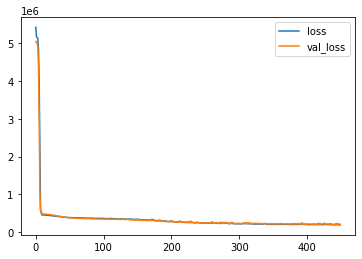

In [ ]:
kayip.plot()


In [ ]:
pre=model.predict(x_test)

In [ ]:

r2_score(y_test,pre)

0.8017016156343971